In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [4]:
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [5]:
list_of_tickers = ["SPY", "AGG"]
tickers = pd.DataFrame(get_symbols())
tickers.head()

,currency,date,exchange,iexId,isEnabled,name,region,symbol,type
0,USD,2019-09-05,NYS,IEX_46574843354B2D52,True,Agilent Technologies Inc.,US,A,cs
1,USD,2019-09-05,NYS,IEX_4238333734532D52,True,Alcoa Corp.,US,AA,cs
2,USD,2019-09-05,PSE,IEX_474B433136332D52,True,Perth Mint Physical Gold ETF,US,AAAU,et
3,USD,2019-09-05,NAS,IEX_4E5434354A302D52,True,Altaba Inc.,US,AABA,cef
4,USD,2019-09-05,NYS,IEX_4843364642592D52,True,AAC Holdings Inc.,US,AAC,cs


## Get 1 years worth of Data via API call and read in as a dataframe

In [6]:
list_of_tickers = ["SPY", "AGG"]

end_date= datetime.now()

start_date= end_date + timedelta(-365)

df = get_historical_data(list_of_tickers,start_date,end_date, output_format="pandas")

df.drop(columns=['open', 'high', 'low', 'volume'],level=1, inplace=True)
df.head()

,SPY,AGG
,close,close
date,,
2018-09-05,289.03,106.01
2018-09-06,288.16,106.19
2018-09-07,287.60,105.81
2018-09-10,288.10,105.91
2018-09-11,289.05,105.73


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [7]:
# Calculate the daily roi for the stocks
daily_returns=df.pct_change()

avg_daily_spy = daily_returns.mean()['SPY']['close']
avg_daily_agg = daily_returns.mean()['AGG']['close']
avg_daily_agg

0.0002937976716919959

In [8]:
# Calculate volatility



std_spy = daily_returns.std()['SPY']['close']
std_agg = daily_returns.std()['AGG']['close']
std_agg

0.0018431141951521215

In [9]:
# Save the last day's closing price

last_day=df.tail(1)
last_day

,SPY,AGG
,close,close
date,,
2019-09-04,294.04,114.04


In [10]:
# # Setup the Monte Carlo Parameters
# number_simulations = 100
# number_records = 252*30

# #set last closing prices for SPY and AGG
# spy_last = df['SPY']['close'][-1]
# agg_last = df['AGG']['close'][-1]

# #Empty dataframe created to hold simulation results 
# simulated_price_df = pd.DataFrame()
# portfolio_cumulative_returns = pd.DataFrame()

In [11]:

# Setup the Monte Carlo Parameters
number_simulations = 500
number_records = 252*30

#set last closing prices for SPY and AGG
spy_last = df['SPY']['close'][-1]
agg_last = df['AGG']['close'][-1]

#Empty dataframe created to hold simulation results 
simulated_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

# Run the Monte Carlo Simulation
for s in range(number_simulations):
    
    simulated_spy_prices = [spy_last]
    simulated_agg_prices = [agg_last]
#     print(simulated_spy_prices)
    
    for i in range(number_records):
        
        #Calculate the simulated price using the last price within the list
        
        sim_spy_result = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_spy,std_spy))
        sim_agg_result = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_agg,std_agg))
    
    
        #append result of current sim to prior simulation LIST
        
        simulated_spy_prices.append(sim_spy_result)
        simulated_agg_prices.append(sim_agg_result)
    
    
    #Append a simulated prices of each simulation to DataFrame
    
    simulated_price_df['SPY Prices']= pd.Series(simulated_spy_prices)
    simulated_price_df['AGG Prices']=pd.Series(simulated_agg_prices)
    
    
    #take the daily simulated DataFrame and calculate the % change of the returns
    
    simulated_daily_returns = simulated_price_df.pct_change()
    
    # set portfolio weights (60% SPY  40% AGG)
    
    weights = [0.60, 0.40]
    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    
    #calculate the normalized, cumulative return series
    portfolio_cumulative_returns[s] = (1+ portfolio_daily_returns.fillna(0)).cumprod()
    
    
    

    
portfolio_cumulative_returns.tail()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
7556,4.514112,3.399897,5.162919,5.803028,5.017926,3.416872,4.929556,8.632039,5.205556,5.863985,...,1.016863,5.527179,2.686554,5.106067,6.542223,7.264611,1.421130,3.953829,9.854639,1.504644
7557,4.504011,3.417110,5.178782,5.794411,4.965733,3.412057,4.894956,8.690561,5.165252,5.854081,...,1.005126,5.521911,2.677887,5.129996,6.535141,7.317349,1.438352,3.952213,9.973768,1.492518
7558,4.476131,3.417041,5.236336,5.795965,4.983767,3.415148,4.907982,8.700467,5.208057,5.823425,...,1.003544,5.556381,2.677909,5.153458,6.580154,7.281880,1.436036,3.918026,10.061104,1.481933
7559,4.465423,3.445866,5.257054,5.799982,4.974431,3.437142,4.906038,8.668293,5.217863,5.792254,...,1.011242,5.585445,2.648287,5.102420,6.589695,7.248203,1.455426,3.911512,10.107606,1.481635
7560,4.454543,3.460164,5.302536,5.800355,4.989542,3.445481,4.899293,8.611331,5.211087,5.788256,...,1.011996,5.623143,2.631723,5.157122,6.593769,7.251922,1.447032,3.872629,10.001812,1.483824


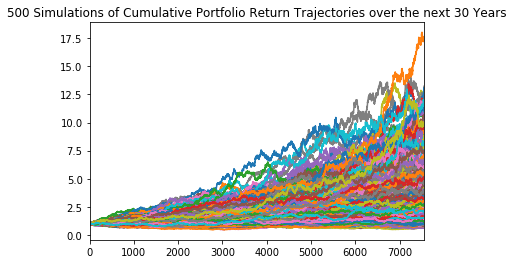

In [12]:
# Visualize the Simulation
plot_title = f"{s+1} Simulations of Cumulative Portfolio Return Trajectories over the next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title)

In [13]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
last_day = portfolio_cumulative_returns.iloc[-1,:]

last_day

0       4.454543
1       3.460164
2       5.302536
3       5.800355
4       4.989542
5       3.445481
6       4.899293
7       8.611331
8       5.211087
9       5.788256
10      1.872151
11      9.928832
12      3.885582
13      1.824837
14      2.788991
15      2.708431
16      2.302371
17      3.472398
18     11.657697
19      3.345583
20      0.788733
21      4.809027
22      3.159742
23      5.446508
24      3.958586
25      7.899440
26      1.462438
27      2.064753
28      3.866024
29      3.076289
         ...    
470     3.387726
471     2.065223
472     2.626611
473     1.830850
474     3.021114
475     4.390178
476     1.928137
477     3.824013
478     3.090575
479     7.976373
480     4.054665
481     3.041248
482     1.146321
483     3.266821
484     1.941113
485     3.757189
486     5.925232
487     4.525974
488     2.513919
489     2.054741
490     1.011996
491     5.623143
492     2.631723
493     5.157122
494     6.593769
495     7.251922
496     1.447032
497     3.8726

In [14]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
second_last_day = portfolio_cumulative_returns.iloc[5040,:]
second_last_day

0      2.022181
1      2.339028
2      1.683948
3      2.710590
4      2.992352
5      2.030148
6      2.335775
7      8.678933
8      2.275368
9      1.886460
10     1.055224
11     3.622183
12     1.750886
13     1.463185
14     1.958094
15     2.905708
16     1.362898
17     3.412232
18     5.667371
19     1.862736
20     1.071878
21     3.903213
22     1.683303
23     4.087953
24     3.496049
25     3.313332
26     1.002667
27     1.222885
28     2.500398
29     2.476677
         ...   
470    2.783352
471    1.537306
472    3.186099
473    1.453811
474    2.093113
475    2.060009
476    1.257776
477    1.803987
478    2.784285
479    3.828980
480    2.771998
481    2.367353
482    1.149409
483    2.485982
484    2.228490
485    1.925353
486    2.685193
487    4.474437
488    1.770091
489    3.065815
490    1.142352
491    2.810607
492    1.870699
493    3.205745
494    2.535097
495    3.731777
496    1.140612
497    2.655983
498    4.117386
499    1.754499
Name: 5040, Length: 500,

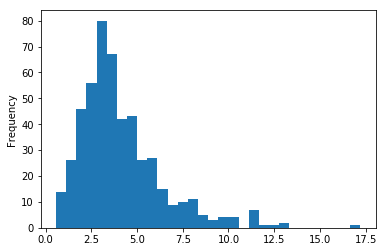

In [15]:
# Display the 90% confidence interval for the ending returns
last_day.plot(kind='hist', bins=30)

In [16]:
last_day.value_counts(bins=10)/ len(last_day)

(2.238, 3.902]      0.406
(3.902, 5.566]      0.222
(0.557, 2.238]      0.172
(5.566, 7.23]       0.102
(7.23, 8.894]       0.052
(8.894, 10.558]     0.022
(10.558, 12.222]    0.016
(12.222, 13.886]    0.006
(15.55, 17.214]     0.002
(13.886, 15.55]     0.000
Name: 7560, dtype: float64

In [17]:
confidence_interval = last_day.quantile(q=[.05,.95])
confidence_interval

0.05    1.389645
0.95    8.777702
Name: 7560, dtype: float64

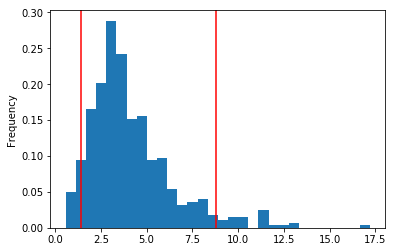

In [18]:
plt.figure();
last_day.plot(kind='hist', density=True, bins=30)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color = 'r')

In [19]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [20]:
confidence_interval_10 = last_day.quantile(q=[.05])
confidence_interval_10
confidence_interval_90 = last_day.quantile(q=[.95])
confidence_interval_90
confidence_interval_50 = last_day.quantile(q=[.5])
confidence_interval_50

print(f"The Expected cumulative returns for the 10% is {confidence_interval_10.iloc[0]}")
print(f"The Expected cumulative returns for the 90% is {confidence_interval_90.iloc[0]}")

print(f"The Expected cumulative returns for the 50% is {confidence_interval_50.iloc[0]}")


The Expected cumulative returns for the 10% is 1.389645392584873
The Expected cumulative returns for the 90% is 8.777702404414008
The Expected cumulative returns for the 50% is 3.530876497470266


In [21]:
ci10 = confidence_interval_10.iloc[0]
ci50 = confidence_interval_50.iloc[0]
ci90 = confidence_interval_90.iloc[0]

print(ci10)
print(ci50)
print(ci90)

1.389645392584873
3.530876497470266
8.777702404414008


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [22]:
initial_investment = 20000

investment_pnl_10 = initial_investment * ci10
investment_pnl_90 = initial_investment * ci90
investment_pnl_50 = initial_investment * ci50

print(f"The Expected cumulative returns for the 10% is ${np.round(investment_pnl_10)}")
print(f"The Expected cumulative returns for the 50% is ${np.round(investment_pnl_50)}")

print(f"The Expected cumulative returns for the 90% is ${np.round(investment_pnl_90)}")


The Expected cumulative returns for the 10% is $27793.0
The Expected cumulative returns for the 50% is $70618.0
The Expected cumulative returns for the 90% is $175554.0


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [31]:
withdrawal_rate = .04* investment_pnl_10

monthly_income = 500

if withdrawal_rate >= monthly_income:
    print('Account owner does not have a surplus and has short term liquidity needs. \n These needs should be met by a bond ladder or money market fund')

Account owner does not have a surplus and has short term liquidity needs. 
 These needs should be met by a bond ladder or money market fund


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [33]:
new_investment =initial_investment*1.5
new_investment

monthly_income=500

investment_pnl_10_new = new_investment * ci10

investment_pnl_10_new
second_withdrawal_rate = investment_pnl_10_new*.04

if second_withdrawal_rate >= monthly_income:
    print("Account owner is still needing cash on a monthly basis in excess of his monthly income. \n The income shortfall will need to come from his portfolio. ")

Account owner is still needing cash on a monthly basis in excess of his monthly income. 
 The income shortfall will need to come from his portfolio. 


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [25]:
# YOUR CODE HERE